## Stock Price Prediction

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset

data = pd.read_csv("./Data/TATACOFFEE.NS.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,9.200,9.300,9.000,9.105,0.150549,17100
1,2002-07-02,9.040,9.200,9.040,9.075,0.150053,21570
2,2002-07-03,9.055,9.175,9.055,9.100,0.150466,4200
3,2002-07-04,9.200,9.200,9.000,9.035,0.149392,19070
4,2002-07-05,9.040,9.200,9.040,9.140,0.151128,6830


In [4]:
df.drop(['Adj Close'], axis=1)


,Date,Open,High,Low,Close,Volume
0,2002-07-01,9.200000,9.300000,9.000000,9.105000,17100
1,2002-07-02,9.040000,9.200000,9.040000,9.075000,21570
2,2002-07-03,9.055000,9.175000,9.055000,9.100000,4200
3,2002-07-04,9.200000,9.200000,9.000000,9.035000,19070
4,2002-07-05,9.040000,9.200000,9.040000,9.140000,6830
...,...,...,...,...,...,...
4416,2020-06-01,76.400002,76.400002,73.750000,74.650002,451420
4417,2020-06-02,75.699997,75.849998,75.050003,75.199997,258386
4418,2020-06-03,74.900002,77.400002,74.900002,76.000000,557300
4419,2020-06-04,75.949997,77.849998,75.800003,76.300003,353347


### Data Information

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4.421000e+03
mean,65.894639,67.104516,64.758810,65.714334,50.470445,9.968099e+05
std,43.526398,44.202053,42.935523,43.453511,46.443185,4.047772e+06
min,6.200000,6.240000,6.110000,6.155000,0.115495,0.000000e+00
25%,26.200001,26.990000,25.565001,26.110001,4.804996,7.366000e+04
50%,72.849998,74.500000,71.300003,72.864998,50.785118,2.809860e+05
75%,96.250000,98.000000,94.875000,96.180000,87.119354,7.148500e+05
max,177.699997,183.500000,170.100006,175.649994,170.516983,1.108157e+08


In [6]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


Date 	-	 0.0
Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0


> Since there is no null valus, we can move further 

<AxesSubplot:>

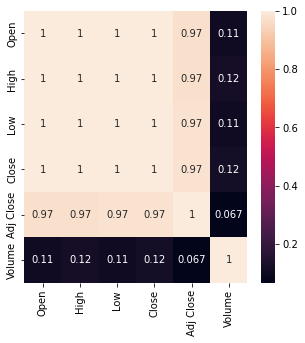

In [7]:
# df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [8]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [9]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.999172
High,0.999697
Low,0.999558
Close,1.000000
Adj Close,0.974743


> Looks like all colums except _volume_ are ***highly co-related***. Using them for predictions.

In [10]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
0,9.200,9.300,9.000,9.105,0.150549
1,9.040,9.200,9.040,9.075,0.150053
2,9.055,9.175,9.055,9.100,0.150466
3,9.200,9.200,9.000,9.035,0.149392
4,9.040,9.200,9.040,9.140,0.151128


In [11]:
df.shape

(4421, 5)

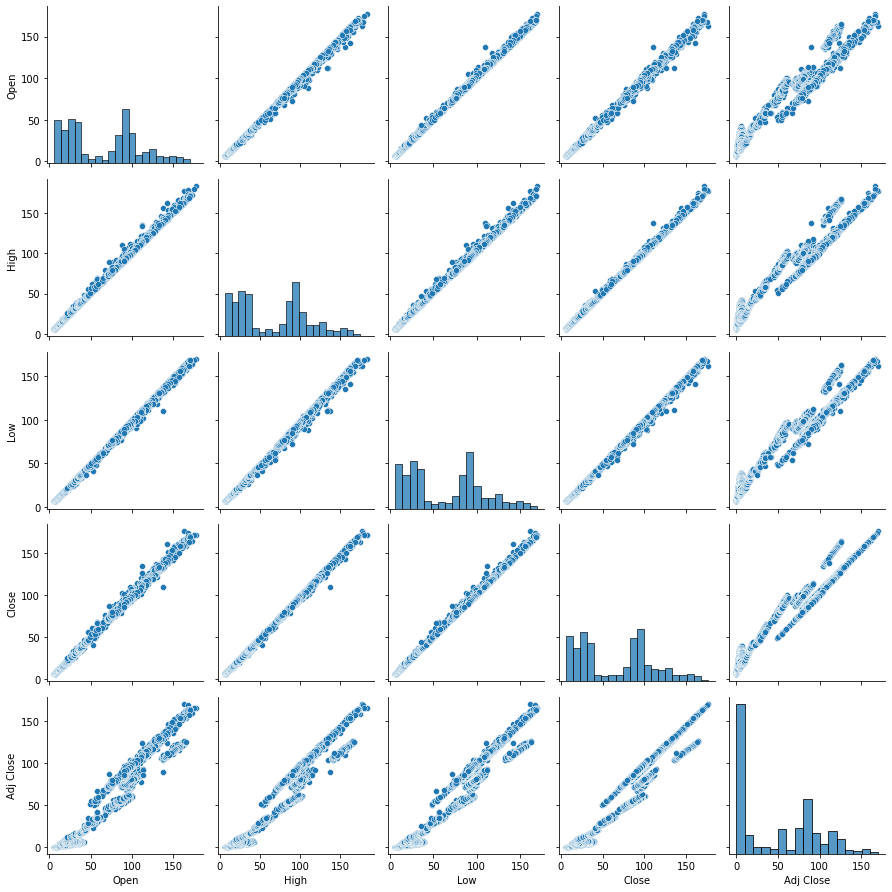

In [12]:
sns.pairplot(df)
plt.tight_layout()

> Since other parameters have linear relationship with __close__, we are using some linear models fore prediction

In [13]:
X = df.drop(['Close'], axis=1)
y = df['Close']

> Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close
0,0.017493,0.017263,0.017623,0.000206
1,0.016560,0.016699,0.017867,0.000203
2,0.016647,0.016558,0.017958,0.000205
3,0.017493,0.016699,0.017623,0.000199
4,0.016560,0.016699,0.017867,0.000209


## Prediction Model

In [15]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

### 1. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [17]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
3536,128.149994,128.023131
3537,129.500000,129.124790
3538,125.699997,125.522143
3539,124.849998,125.468937
3540,119.800003,119.927322


In [18]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9989835472929395


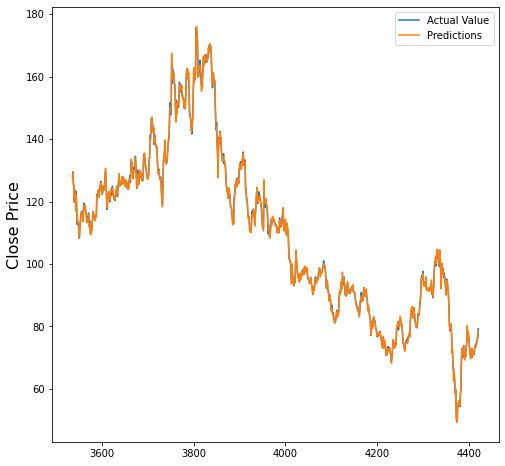

In [19]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()